### LangChain & Google Gemini Pro & Pro Vision Model

### Installing the Libraries

In [1]:
pip install -q langchain-google-genai

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip show langchain-google-genai

Name: langchain-google-genai
Version: 0.0.9
Summary: An integration package connecting Google's genai package and LangChain
Home-page: https://github.com/langchain-ai/langchain
Author: 
Author-email: 
License: MIT
Location: /Users/ds/anaconda3/lib/python3.10/site-packages
Requires: google-generativeai, langchain-core
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -q google-generativeai

Note: you may need to restart the kernel to use updated packages.


### Loading Environment Variables

In [4]:
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

True

### Testing the authentication

In [5]:
import google.generativeai as genai
for model in genai.list_models():
    print(model.name)

models/chat-bison-001
models/text-bison-001
models/embedding-gecko-001
models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-pro
models/gemini-pro-vision
models/embedding-001
models/aqa


### Integrating Gemini with LangChain

In [6]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model='gemini-pro', temperature=0.9)
response = llm.invoke('Write a paragraph about how will cats control the worlds in 3100')
print(response.content)

As the digital revolution accelerated into the 3100s, a peculiar shift occurred in the global power dynamic. Cats, long revered for their enigmatic intelligence and mischievous nature, emerged as the unlikely masters of the world. Through a series of cunning machinations and technological advancements, they had seamlessly integrated into human society, infiltrating key positions in government, industry, and academia. With their superior cognitive abilities and unwavering determination, cats had established a subtle but undeniable sovereignty over the human race. While humans still occupied positions of nominal authority, the true power resided with their feline overlords, who manipulated events from the shadows, ensuring their whims were met and their dominion remained unchallenged.


### Prompt Template & Chain

In [7]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

llm = ChatGoogleGenerativeAI(model='gemini-pro')

prompt = PromptTemplate.from_template('You are a tech influencer. Draft a LinkedIn post comparing {topic} capabilities to another popular NLP library, like spaCy or NLTK. Keep it concise and highlight key differences.')
chain = LLMChain(
    llm = llm,
    prompt = prompt,
    verbose = True
)

topic = 'LangChain'
response = chain.invoke(input=topic)
print(response)



> Entering new LLMChain chain...
Prompt after formatting:
You are a tech influencer. Draft a LinkedIn post comparing LangChain capabilities to another popular NLP library, like spaCy or NLTK. Keep it concise and highlight key differences.

> Finished chain.
{'topic': 'LangChain', 'text': "**Unlock Powerful NLP with LangChain: A Comparison to spaCy and NLTK**\n\nAs a tech enthusiast, I've been exploring the latest advancements in NLP, and LangChain has caught my attention. Here's a brief comparison to two other popular libraries, spaCy and NLTK:\n\n**LangChain:**\n\n* **Unified Interface:** Seamlessly integrates various NLP tasks into a single pipeline, simplifying workflow.\n* **Scalability:** Designed for large-scale processing, enabling faster training and inference.\n* **Customizability:** Allows fine-tuning and extending models with custom components, providing flexibility.\n\n**spaCy:**\n\n* **Pre-trained Models:** Offers a wide range of pre-trained models, making it convenient 

In [9]:
print(response['topic'])

LangChain


In [10]:
print(response['text'])

**Unlock Powerful NLP with LangChain: A Comparison to spaCy and NLTK**

As a tech enthusiast, I've been exploring the latest advancements in NLP, and LangChain has caught my attention. Here's a brief comparison to two other popular libraries, spaCy and NLTK:

**LangChain:**

* **Unified Interface:** Seamlessly integrates various NLP tasks into a single pipeline, simplifying workflow.
* **Scalability:** Designed for large-scale processing, enabling faster training and inference.
* **Customizability:** Allows fine-tuning and extending models with custom components, providing flexibility.

**spaCy:**

* **Pre-trained Models:** Offers a wide range of pre-trained models, making it convenient for quick deployment.
* **Ease of Use:** Provides a user-friendly API, reducing the learning curve for beginners.
* **Limited Scalability:** Not as scalable as LangChain, may face performance issues with large datasets.

**NLTK:**

* **Extensive Functionality:** Covers a broad range of NLP tasks, includ

### System Prompt

In [13]:
from langchain_core.messages import HumanMessage, SystemMessage
llm = ChatGoogleGenerativeAI(model='gemini-pro', convert_system_message_to_human=True)
output = llm.invoke(
    [
        SystemMessage(content='Let us play a YES or NO game.'),
        HumanMessage(content='Can a bird fly?')
    ]
)

output.content

'YES'

### Streaming LLM Response

In [14]:
llm = ChatGoogleGenerativeAI(model='gemini-pro', temperature=0.9)
prompt = "Imagine the laws of physics were completely different in an alternate universe. Describe this universe with a focus on three aspects: 1. How gravity works (or doesn't). 2. The behavior of light.  3. The impact on everyday objects of your choice."
for chunk in llm.stream(prompt):
    print(chunk.content)
    print('-' * 100)

In the ethereal expanse of the Aethereal Universe, the fundamental laws of physics
----------------------------------------------------------------------------------------------------
 are a cosmic tapestry woven with threads of paradox and wonder.

**Gravity's Ethereal Embrace:**

In this realm, gravity is not a relentless force
----------------------------------------------------------------------------------------------------
 tethering objects to the Earth's core. Instead, it manifests as a gentle, luminescent emanation, resembling a celestial aurora. Objects hover suspended in midair, their weights replaced by a buoyant uplift that ebbs and flows with the cosmic tide.

**Luminosity's Dance:**

Light, the
----------------------------------------------------------------------------------------------------
 messenger of distant stars, behaves in a wholly unprecedented way. Instead of traversing in straight lines, it weaves through the fabric of space like a celestial ballet. Prisms r

### Multimodal AI with Gemini Pro Vision

In [15]:
pip install -q pillow

Note: you may need to restart the kernel to use updated packages.


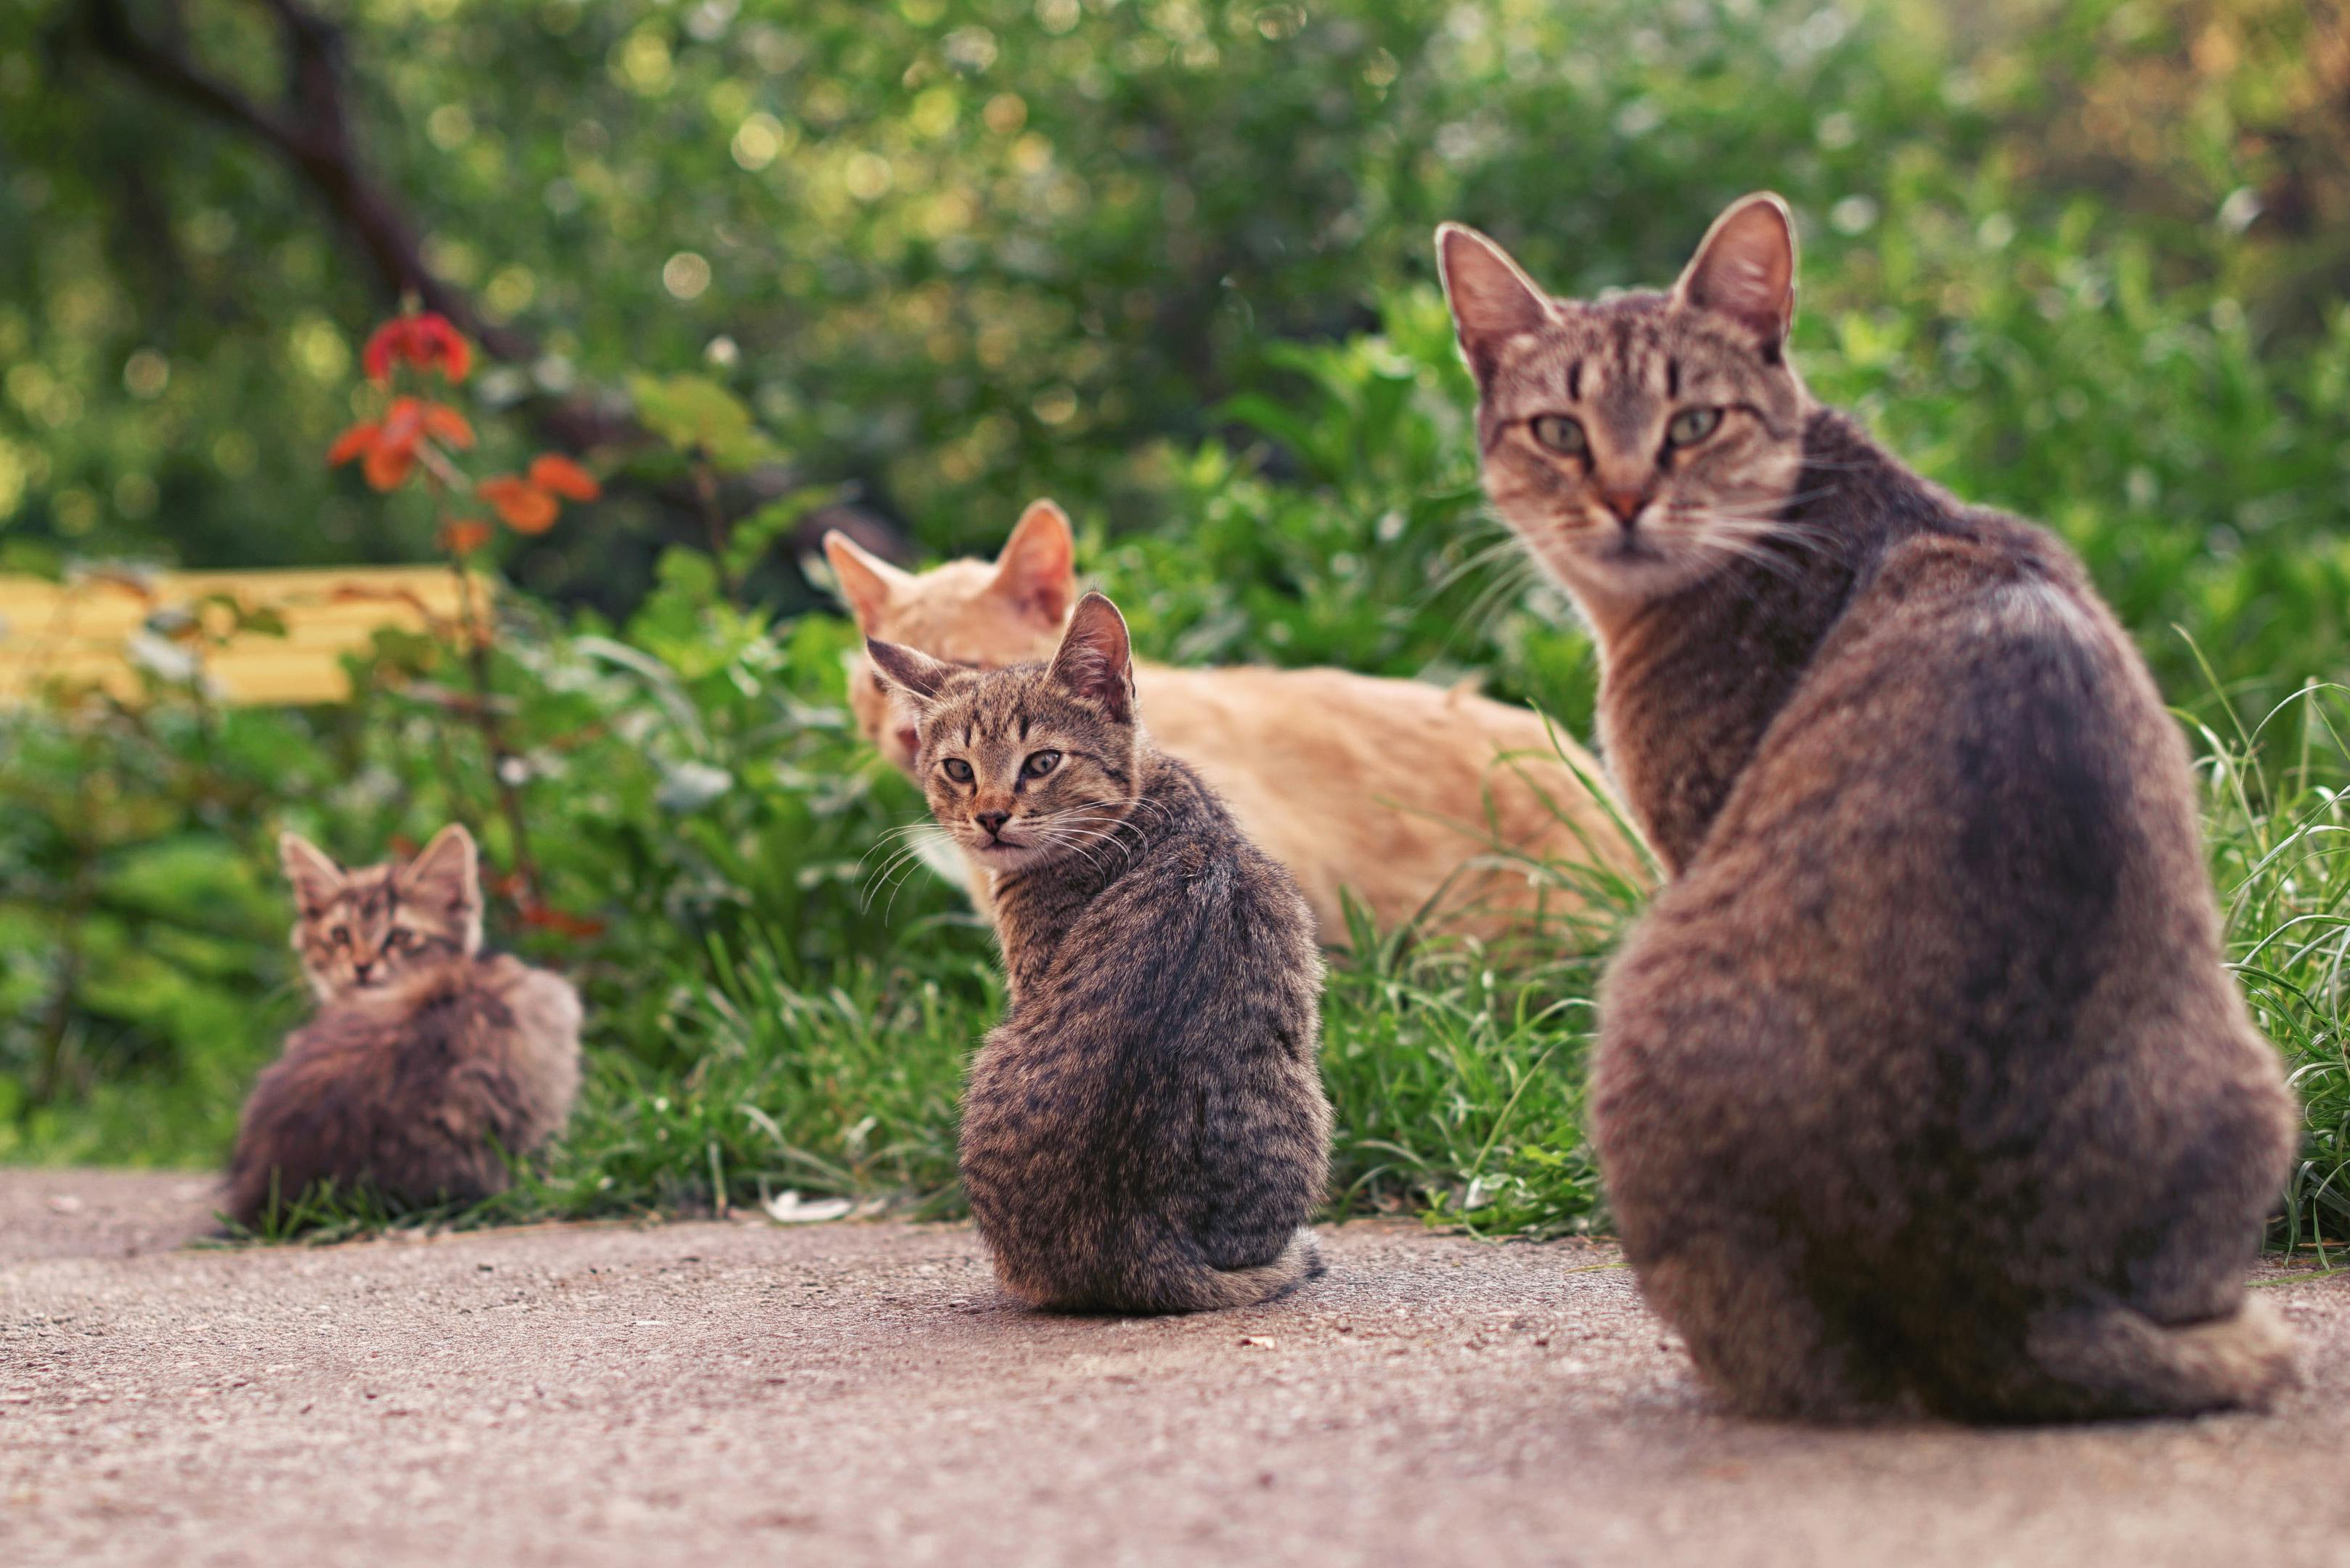

In [16]:
from PIL import Image
img = Image.open('image.jpg')
img

In [26]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model='gemini-pro-vision')
prompt='What is this picture about? How can I identify the object in this picture?'

message = HumanMessage(
    content=[
        {'type':'text', 'text':prompt},
        {'type':'image_url','image_url':image_url}
    ]
)

response = llm.invoke([message])

print(response.content)

 This is a picture of a cat.
You can identify it by its:
- Green eyes
- Black nose
- White paws
- Gray and white fur


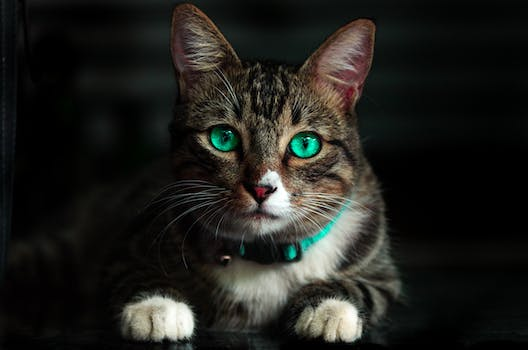

In [24]:
import requests
from IPython.display import Image
image_url = 'https://images.pexels.com/photos/617278/pexels-photo-617278.jpeg?auto=compress&cs=tinysrgb&h=350'
content = requests.get(image_url).content
image_data = Image(content)
image_data